<a href="https://colab.research.google.com/github/felipe-sanches/analise-airbnb-creta/blob/master/An%C3%A1lise_dos_dados_do_Airbnb_Creta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<center><img alt="Creta" width="100%" src="https://raw.githubusercontent.com/felipe-sanches/analise-airbnb-creta/master/crete.jpg"></center>


# **Análise dos Dados do Airbnb - Creta, Grécia**

O [Airbnb](https://www.airbnb.com) já é considerado como sendo a maior empresa hoteleira da atualidade. O ponto mais chamativo nisto é que a empresa não possui nenhum hotel!

Com sua sede em San Francisco, California, o Airbnb funciona conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

É notável a influência do Airbnb no cenário Open Souce, as contribuições para a comunidade podem ser verificadas em uma [página](https://airbnb.io/projects/) web onde encontram-se vários Projetos da Compania.

Uma das iniciativas do Airbnb voltadas ao aberto é disponibilizar dados do site para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

Analisando Airbnb
Neste notebook, serão analisados os dados referentes à Ilha de Creta, na Grécia, e ver quais insights podem ser extraídos a partir de dados brutos.



## Obtenção dos dados
Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Rio de Janeiro (good for visualisations).*

In [0]:
# importando os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [0]:
#importando o arquivo para um dataframe
df = pd.read_csv('http://data.insideairbnb.com/greece/crete/crete/2020-04-30/visualisations/listings.csv')


## Análise dos dados

Esta etapa tem por objetivo compreender a situação inicial, e permitir um entendimento de como os dados estão estruturados.



**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar a análise, vale verificar a estrutura do *dataset*, analisando as 5 primeiras entradas.

In [0]:
#mostrando as 5 primeiras entradas
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,27966,Heraklion-Pinelopi Apartment,120502,Antonia & Manolis,NaN,Μαλεβιζίου,35.33198,25.08182,Entire home/apt,45,2,500,2020-03-06,5.31,2,0
1,28970,artists' house in the old town,124670,Eirini,NaN,Ηρακλείου,35.34005,25.12809,Entire home/apt,70,1,52,2017-10-16,0.44,2,85
2,29856,Matala Dimitris Villa and Hotel,128653,Dimitris,NaN,Φαιστού,34.99311,24.74964,Private room,50,1,40,2019-10-13,0.34,2,199
3,30162,"2 storey Loft in Heraklion, Crete",59966,Nicole,NaN,Ηρακλείου,35.34090,25.13154,Entire home/apt,190,2,18,2018-08-27,0.23,3,363
4,31023,Guesthouse Chryssoula Room No1,133208,Chryssoula,NaN,Χανίων,35.51591,24.01751,Entire home/apt,40,2,262,2020-03-19,2.76,4,268


### **Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este *dataset* que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listings.csv`. Há uma versão mais completa com mais entradas e variáveis. (`listings.csv.gz`).


In [0]:
# Identificando o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}".format(df.shape[1]),"\n")

#Tipos de dados contidos no dataset
display(df.dtypes)

Entradas:	 18371
Variáveis:	 16 



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em aproximadamente 32% das linhas.
* As variáveis `name` e `host_name` têm menos de 0,1% dos valores nulos.





In [0]:
#verificando porcentagem de valores ausentes
porcent=(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)
porcent

neighbourhood_group               1.000000
reviews_per_month                 0.318328
last_review                       0.318328
name                              0.000272
host_name                         0.000054
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Qual o tipo de distribuição das variáveis?** 

A plotagem de histogramas é uma alternativa para identificar mais facilmente a distribuição das variáveis.


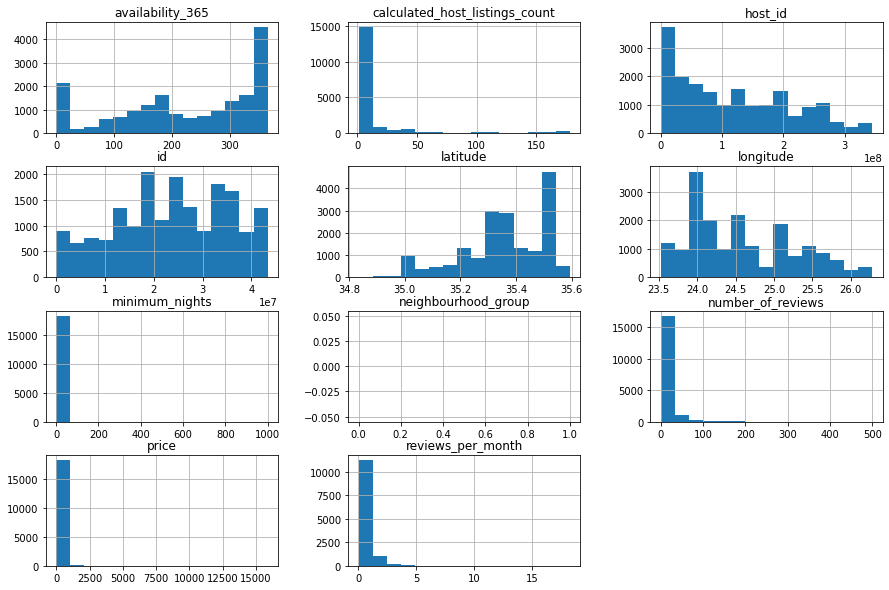

In [0]:
#plotando histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Nas variáveis `price`, `minimum_nights` e `calculated_host_listings_count`, por exemplo.

Os valores não seguem uma distribuição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [0]:
#verificando o resumo estatístico das varíaveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,18371.000000,18371.000000,18371.000000,12523.000000,18371.000000,18371.000000
mean,129.005552,3.294921,10.663328,0.539380,15.732241,223.983561
std,250.864607,10.023077,21.886286,0.694173,35.336721,121.671424
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,50.000000,2.000000,0.000000,0.130000,1.000000,139.000000
50%,75.000000,3.000000,3.000000,0.310000,3.000000,243.000000
75%,132.000000,4.000000,12.000000,0.670000,8.000000,339.000000
max,15870.000000,1000.000000,500.000000,18.240000,178.000000,365.000000


Olhando o resumo estatístico acima, é possível confirmar algumas hipóteses:

* A variável `price` possui 75% do valor abaixo de 132, porém seu valor máximo é 15870.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.

#### Boxplot para minimum_nights


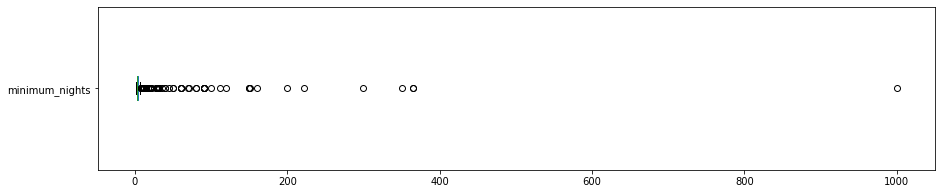

Valores acima de 30 dias para minimum_nights:
37 entradas
Representação em porcentagem: 0.20%


In [0]:
#plotando boxplot para a variável minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

#verificando a quantidade de valores acima de 30 dias para minimum_nights

print("Valores acima de 30 dias para minimum_nights:")
print("{} entradas".format(len(df[df.minimum_nights>30])))
print("Representação em porcentagem: {:.2f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

# Boxplot por preço

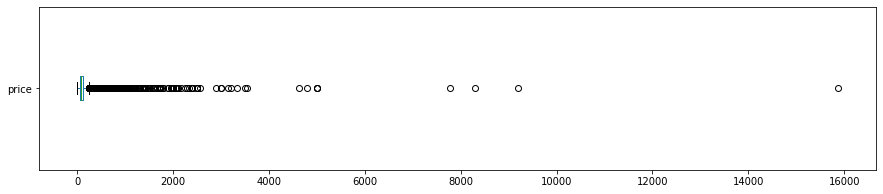


Valores acima de 1500 para price:
65 entradas
Representação em porcentagem: 0.35%


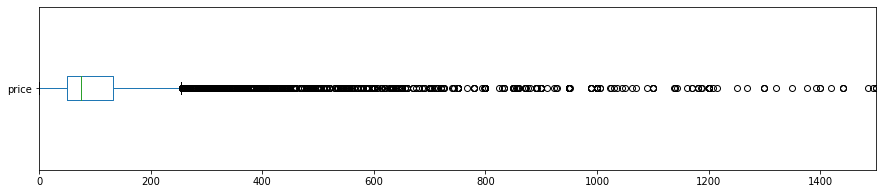

In [0]:
# plotando bloxpot para a variável price
df.price.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# verificando quantidade de valores acima de 1500 para price
print("\nValores acima de 1500 para price:")
print("{} entradas".format(len(df[df.price > 1500])))
print("Representação em porcentagem: {:.2f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

df.price.plot(kind='box', vert=False, xlim=(0,1500),figsize=(15,3))
plt.show()

# Histogramas sem Ouliers

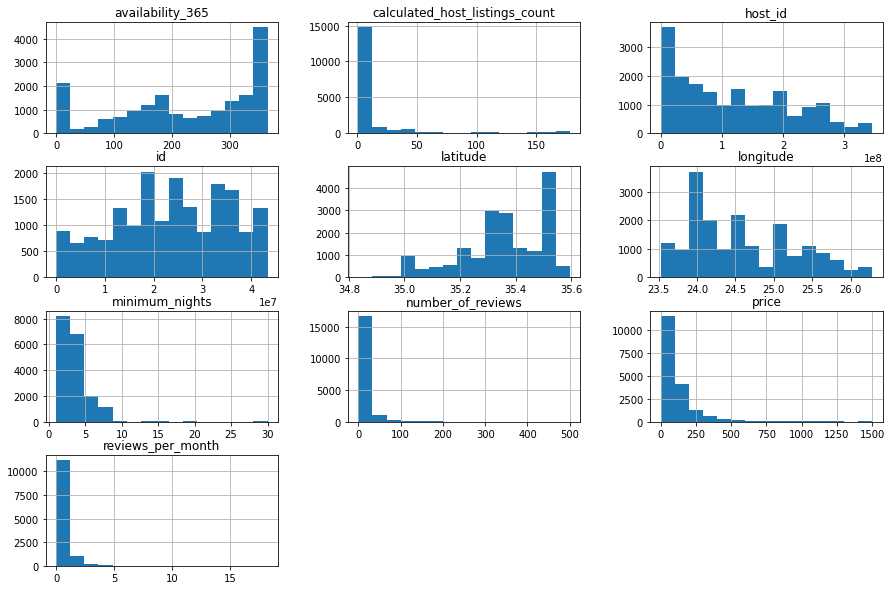

In [0]:
# removendo os outliers em um novo DataFrame

df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

#removendo neighbourhood_group pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

#plotando o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Ao acessar a plataforma da empresa, é possível verificar que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Para saber qual o tipo de acomodação mais alugada, será levada em conta a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [0]:
# mostrando a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    16082
Private room        1541
Hotel room           633
Shared room           14
Name: room_type, dtype: int64

In [0]:
# mostrando a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.880241
Private room       0.084346
Hotel room         0.034647
Shared room        0.000766
Name: room_type, dtype: float64

### **Qual a localidade mais cara em Creta?**

Para comparar os bairros (*neighbourhoods*) a partir do preço de locação, será usada a função `groupby()`, esta é uma maneira de se verificar uma variável em função da outra. 


In [0]:
# verificando os bairros mais caros pela média dos preços
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Αποκορώνου               159.414634
Αγίου Νικολάου           157.245399
Πλατανιά                 144.354839
Μυλοποτάμου              139.427699
Ρεθύμνης                 134.133981
Μαλεβιζίου               130.620321
Κισσάμου                 120.864641
Χανίων                   119.433098
Ιεράπετρας               107.701909
Αρχανών - Αστερουσίων    104.286713
Name: price, dtype: float64

### **Representação da localização dos imóveis**
Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.


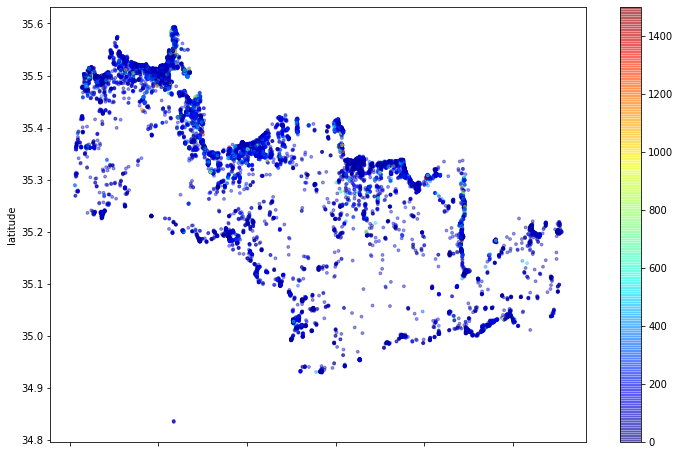

In [0]:
# plotando os imóveis pela latitude e longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusões

Esta é apenas uma análise superficial da referida base de dados do Airbnb, porém percebe-se que existem *outliers* em algumas das variáveis. 

Nota-se também que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

Por fim, vale lembrar que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.